## Use PIMS to load video and sequential images

``pims`` provides three classes for loading video.

* ``ImageSequence`` reads images from a directory.
* ``Video`` reads standard video files (AVI, MOV, etc.).
* ``TiffStack`` reads multi-frame TIF / TIFF files.

Once loaded, these objects can be handled alike. In software terms, each is a subclass of a generic ``Frames`` object.
The differences between the formats are handled quietly by ``pims``.

### Load sequential images from a directory.

Take ``ImageSequence`` as an example. We have a folder of images here:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

We can load them into an ``ImageSequence`` object.

In [2]:
import pims

In [3]:
v = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/trackpy-examples-master/image_sequence/*.png')

We can see basic properties.

In [4]:
v

<Frames>
Source: /Users/pinghanchu/Documents/Git/Data/trackpy-examples-master/image_sequence/*.png
Length: 5 frames
Frame Shape: (424, 640)
Pixel Datatype: uint8

We can print the first frame (it's an array of brightness values) or view those values as an image.

In [5]:
print v[0]

[[121 122 122 ..., 120 119 121]
 [118 119 118 ..., 120 121 122]
 [120 122 118 ..., 121 123 125]
 ..., 
 [125 126 125 ..., 122 122 122]
 [126 127 126 ..., 124 125 125]
 [126 127 126 ..., 126 125 124]]


Frame([[121, 122, 122, ..., 120, 119, 121],
       [118, 119, 118, ..., 120, 121, 122],
       [120, 122, 118, ..., 121, 123, 125],
       ..., 
       [125, 126, 125, ..., 122, 122, 122],
       [126, 127, 126, ..., 124, 125, 125],
       [126, 127, 126, ..., 126, 125, 124]], dtype=uint8)
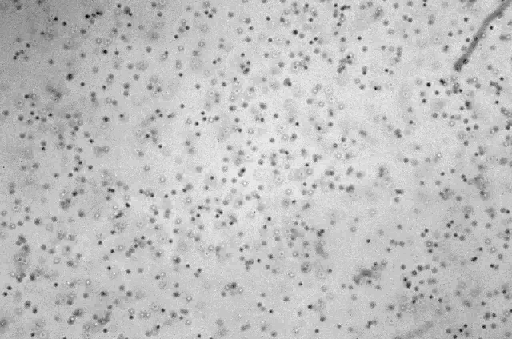

In [6]:
%matplotlib inline
v[0]

### Use subsections of the loaded frames.

We can select a subset of the frames for viewing or processing. Examples:

* ``v[3]`` frame three (an array)
* ``v[:10]`` first 10 frames (a list of arrays)
* ``v[2:5]`` frames 2-5 including 2 and 5 (a list of arrays)
* ``v[100:]`` frames 100 to the end (a list of arrays)

### Loop through the frames to do your image processing.

In [7]:
for frame in v[:]:
    print(frame)
    # Do something with frame, a numpy array.

[[121 122 122 ..., 120 119 121]
 [118 119 118 ..., 120 121 122]
 [120 122 118 ..., 121 123 125]
 ..., 
 [125 126 125 ..., 122 122 122]
 [126 127 126 ..., 124 125 125]
 [126 127 126 ..., 126 125 124]]
[[121 122 122 ..., 120 119 121]
 [118 119 118 ..., 120 121 122]
 [120 122 118 ..., 121 123 125]
 ..., 
 [125 126 125 ..., 122 122 122]
 [126 127 126 ..., 124 125 125]
 [126 127 126 ..., 126 125 124]]
[[121 122 122 ..., 120 119 121]
 [118 119 118 ..., 120 121 122]
 [120 122 118 ..., 121 123 125]
 ..., 
 [125 126 125 ..., 122 122 122]
 [126 127 126 ..., 124 125 125]
 [126 127 126 ..., 126 125 124]]
[[116 118 120 ..., 122 122 122]
 [118 118 119 ..., 122 119 124]
 [120 118 118 ..., 118 123 128]
 ..., 
 [128 127 126 ..., 122 123 123]
 [126 126 126 ..., 123 122 122]
 [128 126 127 ..., 122 122 122]]
[[116 118 120 ..., 122 122 122]
 [118 118 119 ..., 122 119 124]
 [120 118 118 ..., 118 123 128]
 ..., 
 [128 127 126 ..., 122 123 123]
 [126 126 126 ..., 123 122 122]
 [128 126 127 ..., 122 122 122]]


### Load video files or multi-frame TIFFs.

``ImageSequence`` relies only on ``numpy`` and ``scipy``, which are required dependencies of ``mr``, so it works
out of the box. ``Video`` needs [OpenCV](http://opencv.org/), which includes the Python module ``cv2``.
``TiffStack`` needs ``libtiff``.

Once these dependencies are in place, ``Video`` and ``TiffStack`` work in the same way as ``ImageSequence``.

In [8]:
v = pims.Cine('/Users/pinghanchu/Documents/Git/Data/Shot119_Cam_18158_Cine1.cine')
# This file is not included in PIMS, to keep the file size small.
# Try it with a video file of your own.

Frame([[0, 0, 2, ..., 0, 0, 2],
       [0, 0, 0, ..., 2, 0, 1],
       [2, 0, 0, ..., 0, 0, 3],
       ..., 
       [0, 0, 1, ..., 0, 3, 0],
       [3, 0, 0, ..., 2, 3, 0],
       [3, 0, 0, ..., 0, 1, 3]], dtype=uint8)
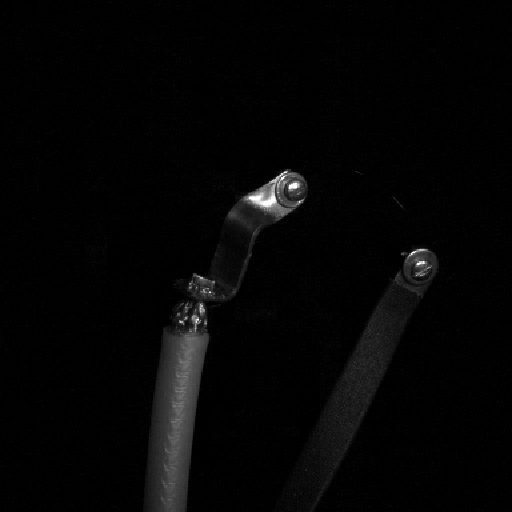

In [17]:
v[0]

In [15]:
v = pims.TiffStack('/Users/pinghanchu/Documents/Git/Data/Shot119_Cam_18333.tif')

In [16]:
v

<Frames>
Source: /Users/pinghanchu/Documents/Git/Data/Shot119_Cam_18333.tif
Length: 4745 frames
Frame Shape: (384, 384)
Pixel Datatype: B

In [236]:
v1 = tp.bandpass(v[0],1, 300)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

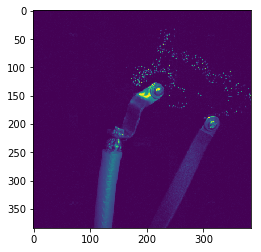

In [138]:
plt.imshow(v[500])

In [146]:
f = tp.locate(v[500], 5, invert=True)

In [20]:
f.head()

,x,y,mass,size,ecc,signal,raw_mass,ep,frame
0,134.714286,6.579365,100.859197,3.453776,0.098436,1.867763,20614.0,0.253516,3000
1,84.062344,7.910224,106.996132,3.461581,0.082197,1.867763,20615.0,0.253455,3000
2,233.950125,8.007481,106.996132,3.498129,0.041981,1.867763,20607.0,0.253949,3000
3,341.260870,12.787724,104.327899,3.428107,0.062236,1.867763,20615.0,0.253455,3000
4,180.960549,15.221269,155.557968,3.484344,0.077870,2.668233,20607.0,0.253949,3000


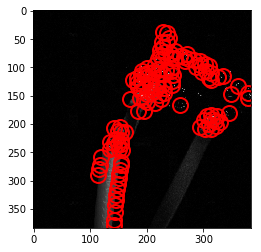

In [147]:
plt.figure()  # make a new figure
tp.annotate(f, v[500]);

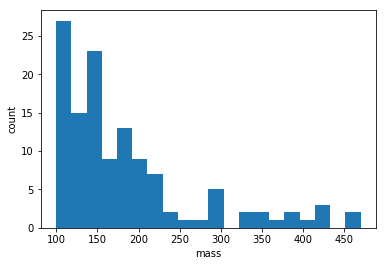

In [148]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

In [155]:
f = tp.locate(v[500], 5, invert=True, minmass=150)

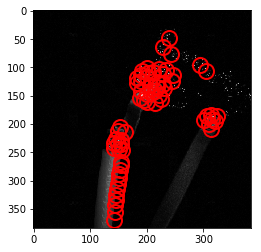

In [156]:
plt.figure()  # make a new figure
tp.annotate(f, v[500]);

In [82]:
np.max(test)

255

In [89]:
test1 = tp.bandpass(test,1, 300)

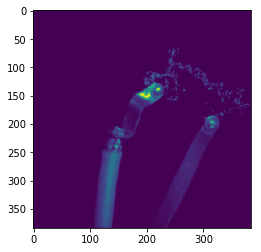

In [90]:
plt.imshow(test1)

In [96]:
test = v[300]-v[0]

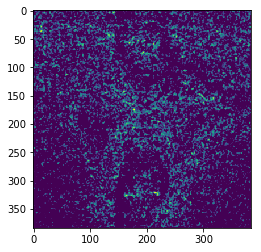

In [109]:
#print(test)
test1 = tp.bandpass(test,1, 200)
plt.imshow(test1)

In [198]:
test1 = v[300][135:150]

In [199]:
test1

Frame([[1, 1, 0, ..., 3, 0, 1],
       [3, 2, 3, ..., 0, 1, 0],
       [0, 3, 1, ..., 2, 4, 0],
       ..., 
       [0, 0, 0, ..., 1, 5, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 0, 0]], dtype=uint8)

In [203]:
test2 = v[0][135:150]

In [204]:
test2

Frame([[0, 0, 2, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 2, 1],
       ..., 
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [208]:
print(test1[3:4])

[[  2   0   2   0   1   2   1   1   0   0   0   1   3   1   3   1   0   1
    3   0   1   0   0   2   2   2   0   1   2   2   0   0   2   0   0   0
    1   1   0   3   0   0   0   0   0   0   2   0   1   2   0   0   2   0
    0   2   0   0   1   1   0   1   2   0   3   0   1   3   0   0   0   1
    0   1   1   0   3   5   2   0   0   2   0   1   0   0   0   0   0   0
    1   1   0   2   0   0   0   2   1   1   0   0   0   0   2   2   0   0
    1   1   0   0   2   4   2   0   2   0   1   3   0   0   1   3   1   2
    1   2   0   0   1   0   0   3   0   5   0   0   1   3   0   0   0   0
    3   2   0   1   2   0   4   1   2   1   1   5   3   3   0   3   0   0
    3   0   5   2   1   1   1   1   0   3   2   1   3   2   1   2   4   1
    1   0   0   0   3   0   0   0   2   0   0   1   0   0   0   0   2  15
   37 107 133 131 107  75  91 153 159  80 172 138 105 108 134 124  50  90
   68 154 246 228 255 255 235 196 140  87  80  54  38  64  22   5   2   0
    0   4  99  22   2   2   2   0   4 

In [209]:
print(test2[3:4])

[[  0   1   1   1   1   1   2   0   1   0   0   3   5   1   0   2   0   1
    0   1   3   0   0   1   0   0   0   3   2   0   0   0   1   0   0   0
    2   0   0   0   0   2   2   1   2   0   0   0   0   3   2   1   0   0
    0   0   0   0   0   2   0   0   2   0   0   0   0   3   0   3   0   0
    0   2   0   0   0   3   0   0   0   0   0   0   1   0   0   0   0   1
    0   0   2   5   1   0   0   3   0   0   1   1   1   0   1   0   0   2
    0   1   2   2   1   0   0   0   1   1   0   5   4   0   1   3   3   1
    1   2   0   2   1   0   3   0   0   0   0   0   2   4   5   2   0   3
    4   4   0   3   1   0   1   1   6   3   0   2   2   2   0   0   1   0
    2   1   3   2   3   4   0   0   1   1   2   3   0   4   3   0   5   1
    0   0   3   3   0   0   0   3   2   0   0   0   0   0   0   0   5  13
   34 106 134 131 107  73  89 153 161  80 173 137 102 108 137 125  50  91
   67 154 245 228 255 255 234 198 141  84  79  52  34  61  19   5   0   0
    0   0   0   2   2   2   4   1   0 

In [228]:
test3 = tp.bandpass(test1,2, 300)

test4 = tp.bandpass(test2,1, 300)

In [229]:
print(test3[3:4])

[[   0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0. 

In [226]:
print(test4[3:4])

[[   0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0. 

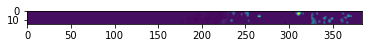

In [227]:
plt.imshow(test3-test4)